# Laptop Price Prediction - Machine Learning Project

- Objective: Predict laptop prices using machine learning models.
- Dataset: Laptop specifications and prices provided by SmartTech Co.
- Goals:
  - Accurate price prediction
  - Understanding feature influence
  - Business insight for pricing and positioning

#### Importing Libraries

In [4]:
# For data handling and manipulation
import pandas as pd
import numpy as np

# For visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# For model building and Evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import xgboost as xgb

#### Loading the Dataset

In [6]:
data=pd.read_csv(r"C:\Users\yasod\Downloads\laptop (1)\laptop.csv")


## Data Preprocessing

In [8]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
data.shape

(1303, 13)

In [10]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [11]:
data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [18]:
data.dtypes

Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [22]:
data.duplicated().sum()

58

In [24]:
data=data.drop_duplicates()

## Null values Check

In [27]:
data.isnull().sum()

Company             1
TypeName            1
Inches              1
ScreenResolution    1
Cpu                 1
Ram                 1
Memory              1
Gpu                 1
OpSys               1
Weight              1
Price               1
dtype: int64

In [29]:
data[data.isnull().all(axis=1)]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dropping null values since all rows are Nan which are useless for the model.

In [32]:
data.dropna(inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   object 
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   object 
 10  Price             1244 non-null   float64
dtypes: float64(1), object(10)
memory usage: 116.6+ KB


## Datatypes Check

In [37]:
data.rename(columns={"Inches":"Size(Inches)","TypeName":"Type","Ram":"Ram(GB)","Weight":"Weight(Kg)"},inplace=True)

In [39]:
data=data.replace("?",np.nan)

In [41]:
data["Size(Inches)"]=data["Size(Inches)"].astype(float)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   Type              1244 non-null   object 
 2   Size(Inches)      1243 non-null   float64
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram(GB)           1244 non-null   object 
 6   Memory            1243 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight(Kg)        1243 non-null   object 
 10  Price             1244 non-null   float64
dtypes: float64(2), object(9)
memory usage: 116.6+ KB


In [45]:
data["Ram(GB)"]=data["Ram(GB)"].str.replace("GB","").astype(int)
data["Weight(Kg)"]=data["Weight(Kg)"].str.replace("kg","").astype(float)

In [47]:
# categorical column. hence filling null with mode value
data['Memory'].fillna(data['Memory'].mode()[0], inplace=True)

C:\Users\yasod\AppData\Local\Temp\ipykernel_444\686094488.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Memory'].fillna(data['Memory'].mode()[0], inplace=True)


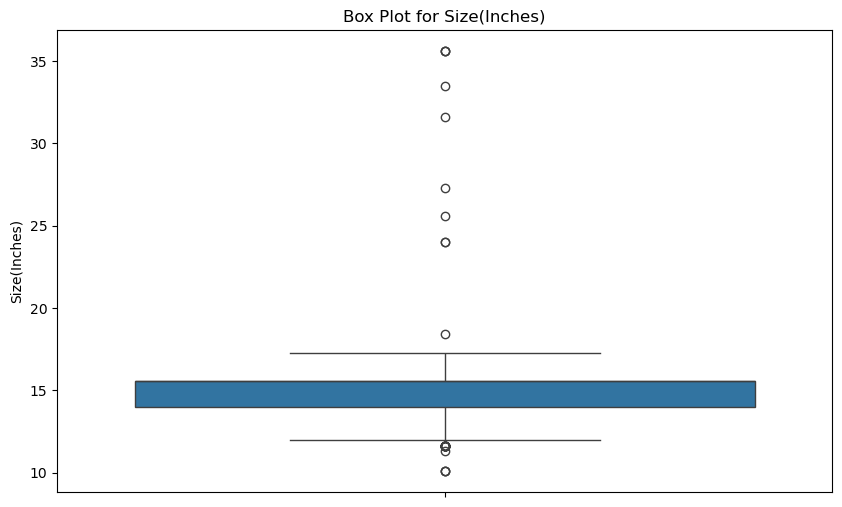

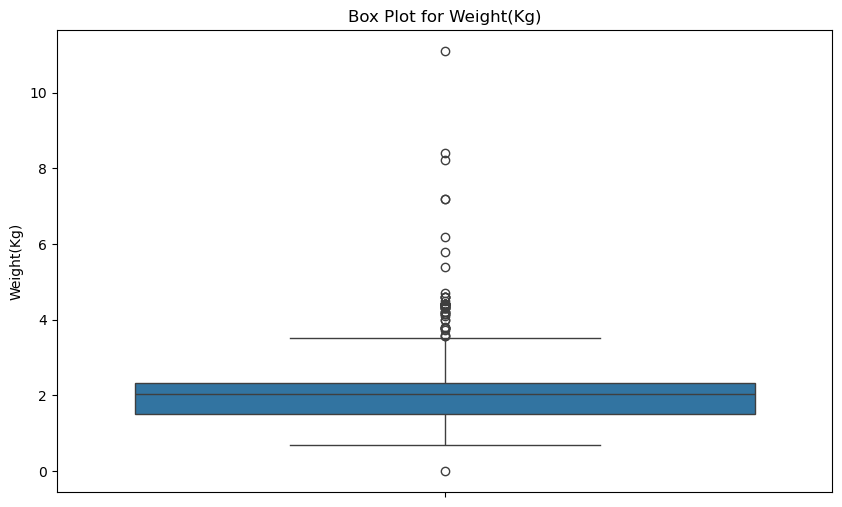

In [49]:
# numerical column. checking for outliers

# Create a box plot for 'Size(Inches)'
plt.figure(figsize=(10, 6))
sns.boxplot(data['Size(Inches)'])
plt.title('Box Plot for Size(Inches)')
plt.show()

# Create a box plot for 'Weight(Kg)'
plt.figure(figsize=(10, 6))
sns.boxplot(data['Weight(Kg)'])
plt.title('Box Plot for Weight(Kg)')
plt.show()


In [50]:
#since many outliers handling null with median
data["Size(Inches)"].fillna(data["Size(Inches)"].median(),inplace=True)
data["Weight(Kg)"].fillna(data["Weight(Kg)"].median(),inplace=True)

C:\Users\yasod\AppData\Local\Temp\ipykernel_444\4114346304.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Size(Inches)"].fillna(data["Size(Inches)"].median(),inplace=True)
C:\Users\yasod\AppData\Local\Temp\ipykernel_444\4114346304.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   Type              1244 non-null   object 
 2   Size(Inches)      1244 non-null   float64
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram(GB)           1244 non-null   int32  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight(Kg)        1244 non-null   float64
 10  Price             1244 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 111.8+ KB


In [55]:
num_col=data.select_dtypes(include=["int64","float64"]).columns
print(num_col)
print(len(num_col))

Index(['Size(Inches)', 'Weight(Kg)', 'Price'], dtype='object')
3


In [57]:
cat_col=data.select_dtypes(include="object").columns
print(cat_col)
print(len(cat_col))

Index(['Company', 'Type', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys'], dtype='object')
7


### Outlier Handling for numerical columns

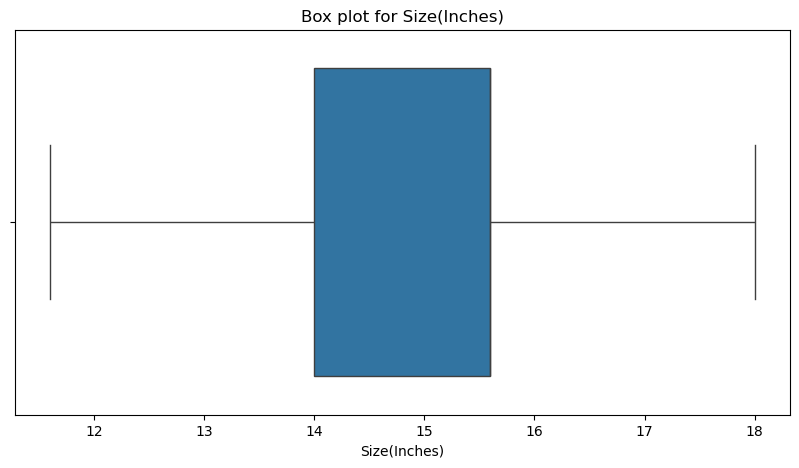

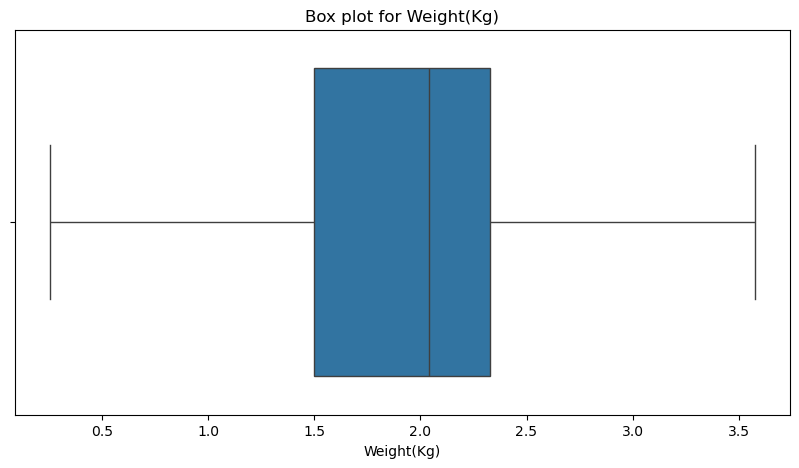

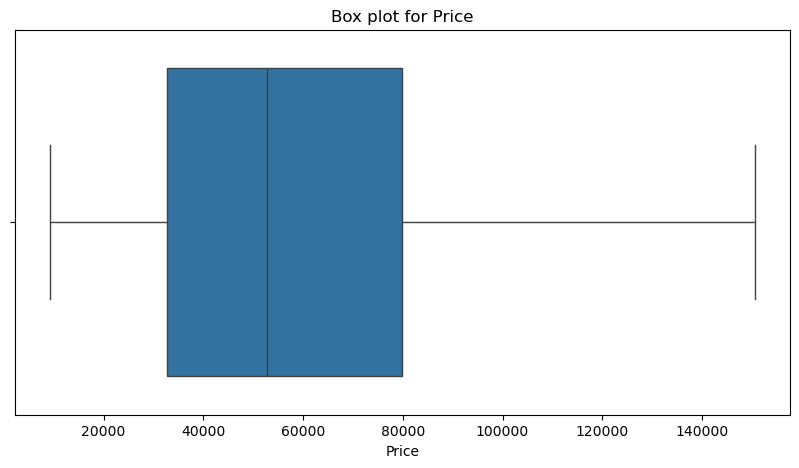

In [60]:
for i in num_col:
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1

    lb = Q1 - 1.5*IQR
    ub = Q3 + 1.5*IQR
    outliers=data[(data[i]<lb) | (data[i]>ub)]
    #print(outliers[i])

    data[i]=data[i].clip(lower=lb,upper=ub)
    
    plt.figure(figsize=(10,5))
    sns.boxplot(x=data[i])
    plt.title(f'Box plot for {i}')
    plt.show()
   

## Feature Engineering


### Feature Engg: "ScreenResolution"

In [64]:
data["Touchscreen"]=data["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

In [66]:
data[["x_res","y_res"]]=data["ScreenResolution"].str.extract(r'(\d+)\s*x\s*(\d+)')
data[["x_res","y_res"]]=data[["x_res","y_res"]].astype(int)

In [68]:
data.drop(columns="ScreenResolution",inplace=True)

### Feature Engg: "Memory"

In [71]:
def extract_SSD(memory_string):
    parts = memory_string.split()
    for i in range(len(parts)):
        if parts[i] == "SSD":
            size = parts[i - 1]
            return convert_to_gb(size)
    return 0

def extract_HDD(memory_string):
    parts = memory_string.split()
    for i in range(len(parts)):
        if parts[i] == "HDD":
            size = parts[i - 1]
            return convert_to_gb(size)
    return 0

def Flash_storage(memory_string):
    parts = memory_string.split()
    for i in range(len(parts) - 1):  # Prevent index out of range
        if "Flash" in parts[i] and "Storage" in parts[i + 1]:
            size = parts[i - 1]
            return convert_to_gb(size)
    return 0

def extract_Hybrid(memory_string):
    parts = memory_string.split()
    for i in range(len(parts)):
        if parts[i] == "Hybrid":
            size = parts[i - 1]
            return convert_to_gb(size)
    return 0

def convert_to_gb(size_str):
    if "GB" in size_str:
        return int(size_str.replace("GB", ""))
    elif "TB" in size_str:
        return int(float(size_str.replace("TB", "")) * 1024)
    return 0


In [73]:
data["SSD_size(GB)"] = data["Memory"].apply(extract_SSD)
data["HDD_size(GB)"] = data["Memory"].apply(extract_HDD)
data["Flash_Storage"] = data["Memory"].apply(Flash_storage)
data["Hybrid_size(GB)"] = data["Memory"].apply(extract_Hybrid)

data.drop(columns="Memory", inplace=True)


### Feature Engg: combining "Size(Inches) and "ScreenResolution" to get PPI(Pixes per inch)

In [76]:
data["PPI"]=((data["x_res"]**2 + data["y_res"]**2)**0.5)/data["Size(Inches)"]
data.drop(columns=["Size(Inches)","x_res","y_res"],inplace=True)

In [78]:
data.columns

Index(['Company', 'Type', 'Cpu', 'Ram(GB)', 'Gpu', 'OpSys', 'Weight(Kg)',
       'Price', 'Touchscreen', 'SSD_size(GB)', 'HDD_size(GB)', 'Flash_Storage',
       'Hybrid_size(GB)', 'PPI'],
      dtype='object')

### Feature Engg: "CPU"

In [81]:
data["CPU_Model"] = data["Cpu"].str.extract(r"(Intel Core i[357]\s*\d{3,4}|Intel Pentium|AMD Ryzen \d|Apple M1|AMD A\d-Series)")
data["CPU_Manufacturer"] = data["Cpu"].str.extract(r"(Intel|AMD)")
data["CPU_Clock_Speed"] = data["Cpu"].str.extract(r"(\d+\.\d+)GHz").astype(float)

data['CPU_Manufacturer'].fillna(data['CPU_Manufacturer'].mode()[0], inplace=True)
data['CPU_Model'].fillna(data['CPU_Model'].mode()[0], inplace=True)
data['CPU_Clock_Speed'].fillna(data['CPU_Clock_Speed'].mean(), inplace=True)

data.drop(columns=["Cpu"], inplace=True)

C:\Users\yasod\AppData\Local\Temp\ipykernel_444\892598944.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CPU_Manufacturer'].fillna(data['CPU_Manufacturer'].mode()[0], inplace=True)
C:\Users\yasod\AppData\Local\Temp\ipykernel_444\892598944.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

### Feature Engg: "GPU"

In [84]:
data["GPU_Manufacturer"] = data["Gpu"].str.extract(r"(Intel|Nvidia|AMD|ARM)")
data["GPU_Model"] = data["Gpu"].str.extract(r"(GeForce [\w\s]+|Radeon [\w\s]+|UHD Graphics [\d]+|HD Graphics [\d]+|Mali [\w\s]+)")
data["GPU_Series"] = data["Gpu"].str.extract(r"(GeForce|Radeon|UHD|HD|Mali)")

data["GPU_Manufacturer"].fillna("Unknown", inplace=True)
data["GPU_Model"].fillna("Unknown", inplace=True)
data["GPU_Series"].fillna("Unknown", inplace=True)

data.drop(columns=["Gpu"], inplace=True)

C:\Users\yasod\AppData\Local\Temp\ipykernel_444\2016789563.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["GPU_Manufacturer"].fillna("Unknown", inplace=True)
C:\Users\yasod\AppData\Local\Temp\ipykernel_444\2016789563.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [86]:
data["OpSys"].value_counts()

OpSys
Windows 10      1022
No OS             63
Linux             57
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [88]:
data["GPU_Series"].value_counts()

GPU_Series
HD         603
GeForce    357
Radeon     163
UHD         66
Unknown     54
Mali         1
Name: count, dtype: int64

## Encoding

In [91]:
# Apply Label Encoding to CPU and GPU Manufacturers
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['CPU_Manufacturer_Encoded'] = encoder.fit_transform(data['CPU_Manufacturer'])
data['GPU_Manufacturer_Encoded'] = encoder.fit_transform(data['GPU_Manufacturer'])

# Apply One-Hot Encoding to categorical columns using get_dummies
data = pd.get_dummies(data, columns=["Company", "Type", "CPU_Model", "GPU_Model", "OpSys", "GPU_Series"], drop_first=True)

data.drop(columns=['CPU_Manufacturer', 'GPU_Manufacturer'], inplace=True)


Index(['Weight(Kg)', 'Price', 'Touchscreen', 'SSD_size(GB)', 'HDD_size(GB)',
       'Flash_Storage', 'Hybrid_size(GB)', 'PPI', 'CPU_Clock_Speed'],
      dtype='object')
9


<function matplotlib.pyplot.show(close=None, block=None)>

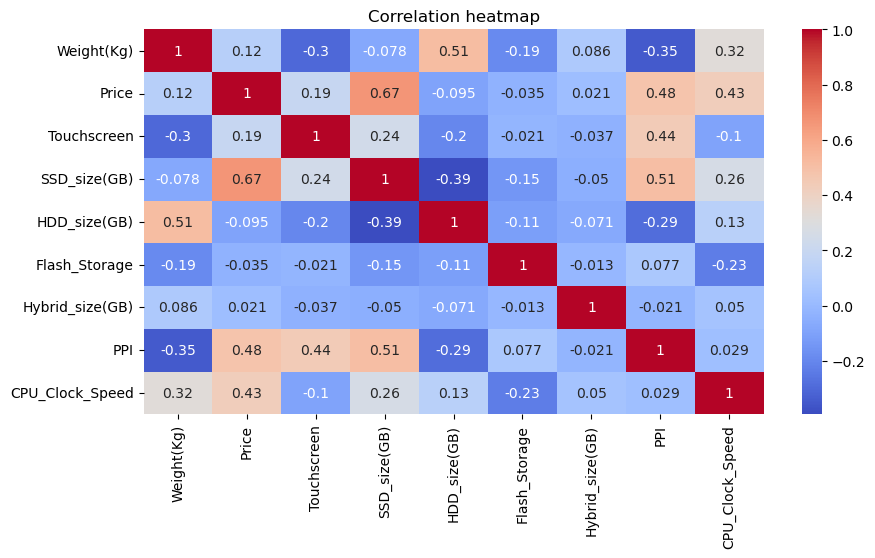

In [93]:
num_col=data.select_dtypes(include=["int64","float64"]).columns
print(num_col)
print(len(num_col))

plt.figure(figsize=(10,5))
plt.title("Correlation heatmap")
sns.heatmap(data[num_col].corr(),annot=True,cmap="coolwarm")
plt.show

## Feature Selection

In [98]:
corr_matrix=data.corr(numeric_only=True)
correlation = corr_matrix['Price'].sort_values(ascending=False)
print(correlation)

Price                           1.000000
SSD_size(GB)                    0.666803
Ram(GB)                         0.658035
PPI                             0.481716
CPU_Clock_Speed                 0.425989
                                  ...   
GPU_Model_HD Graphics 500      -0.219768
GPU_Series_Radeon              -0.220173
CPU_Model_Intel Core i3 6006   -0.253705
CPU_Model_Intel Core i5 7200   -0.272159
Type_Notebook                  -0.584709
Name: Price, Length: 163, dtype: float64


In [100]:
selected_features=correlation[abs(correlation)>0.3].index.tolist()
print(selected_features)

selected_features.remove("Price")

X_filtered=data[selected_features]
y=data["Price"]

['Price', 'SSD_size(GB)', 'Ram(GB)', 'PPI', 'CPU_Clock_Speed', 'Type_Gaming', 'GPU_Model_GeForce GTX 1070', 'CPU_Model_Intel Core i7 7700', 'GPU_Manufacturer_Encoded', 'Type_Notebook']


corr_selected=X_filtered.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_selected, annot=True, cmap='coolwarm')
plt.title("Correlation Between Selected Features")
plt.show()

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Columns: 163 entries, Ram(GB) to GPU_Series_Unknown
dtypes: bool(151), float64(4), int32(3), int64(5)
memory usage: 295.2 KB


Summary:
Total rows: 1244
Total columns: 163
Data types:
bool: 151 columns → likely from get_dummies() (One-Hot Encoding)
float64: 4 columns → probably continuous features like Price, PPI, etc.
int32: 3 columns → possibly encoded values or count-based features
int64: 5 columns → like Ram(GB), storage sizes, etc.
Memory usage: Reasonable (295.2 KB)

Fully numeric ✅

Cleaned and encoded ✅

Free from object-type columns ✅ Can proceed to Modelling

# Model Building and Evaluation

- Train-test split
- Models:
  - Linear Regression (optional baseline)
  - Random Forest
  - Gradient Boosting
  - XGBoost
- Evaluation metrics:
  - R2 Score
  - MAE
  - MSE
  - RMSE

## Overfit/Underfit Check

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

X=data.drop("Price",axis=1)
y=data["Price"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 21)

model=LinearRegression()
model.fit(X_train,y_train)

y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

print("R2_score(train):",r2_score(y_train,y_train_pred))
print("R2_score(test):",r2_score(y_test,y_test_pred))

R2_score(train): 0.8676855340154016
R2_score(test): 0.7631407553747114


In [159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

X=data.drop("Price",axis=1)
y=data["Price"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)

model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print("R2_square:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))


R2_square: 0.7631407553747114
MAE: 11604.603047660017
MSE: 263316189.76306006
RMSE: 16227.02035997552


In [163]:
from sklearn.tree import DecisionTreeRegressor

DT=DecisionTreeRegressor()
DT.fit(X_train,y_train)

y_pred=DT.predict(X_test)

print("R2_score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

R2_score: 0.6775110995989718
MAE: 13018.20196626506
MSE: 358510594.0399992
RMSE: 18934.37598760517


In [165]:
from sklearn.neighbors import KNeighborsRegressor

KNN=KNeighborsRegressor()
KNN.fit(X_train,y_train)

y_pred=KNN.predict(X_test)

print("R2_score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

R2_score: 0.7498346812490158
MAE: 11641.116975903617
MSE: 278108539.3081491
RMSE: 16676.58656044903


In [161]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred=rf.predict(X_test)

print("R2_square:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))


R2_square: 0.8270012442722016
MAE: 9468.008329140102
MSE: 192322546.93735805
RMSE: 13868.040486577693


In [171]:
from sklearn.ensemble import RandomForestRegressor

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=23)

model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print("R2_square:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

R2_square: 0.8283845797420629
MAE: 10557.352360145742
MSE: 213393987.3763953
RMSE: 14608.011068464977


In [173]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

y_pred=gb.predict(X_test)

print("R2_square:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

R2_square: 0.8682275280411834
MAE: 9455.659282684952
MSE: 163851553.52282867
RMSE: 12800.451301529516


In [175]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb.fit(X_train, y_train)

# 3. Predict
y_pred = xgb.predict(X_test)

# 4. Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("XGBoost Performance:")
print("R2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

XGBoost Performance:
R2 Score: 0.8544195763115705
MAE: 9039.918882435994
MSE: 181020953.99193722
RMSE: 13454.402773513852


## Cross-Validation

In [178]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb, X, y, cv=5, scoring='r2')
print("Cross-validated R2 scores:", scores)
print("Mean R2 score:", scores.mean())

Cross-validated R2 scores: [0.82774859 0.86229545 0.85869515 0.77594461 0.79001219]
Mean R2 score: 0.822939197628043


## Model Comparison

In [272]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

results_df = pd.DataFrame(columns=['Model', 'R2_Score', 'MAE', 'RMSE'])

def evaluate_model(model_name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    global results_df  # So it can update the outer DataFrame
    results_df = pd.concat([results_df, pd.DataFrame([{
        'Model': model_name,
        'R2_Score': r2,
        'MAE': mae,
        'RMSE': rmse
    }])], ignore_index=True)



from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
evaluate_model("Linear Regression", y_test, y_pred_lr)

# For Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
evaluate_model("Decision Tree", y_test, y_pred_dt)

from sklearn.neighbors import KNeighborsRegressor

KNN=KNeighborsRegressor()
KNN.fit(X_train,y_train)
y_pred_knn=KNN.predict(X_test)
evaluate_model("KNN",y_test,y_pred_knn)

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
evaluate_model("RandomForest",y_test,y_pred_rf)

from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb=gb.predict(X_test)
evaluate_model("GradientBoosting",y_test,y_pred_gb)

from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
evaluate_model("XGBoost",y_test,y_pred_xgb)

print(results_df)
results_df.sort_values(by='R2_Score', ascending=False)


C:\Users\yasod\AppData\Local\Temp\ipykernel_444\273051634.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([{


               Model  R2_Score           MAE          RMSE
0  Linear Regression  0.828385  10557.352360  14608.011068
1      Decision Tree  0.723227  11811.917624  18551.324693
2                KNN  0.683057  12452.018623  19851.960844
3       RandomForest  0.862324   9276.425699  13084.068614
4   GradientBoosting  0.868228   9455.659283  12800.451302
5            XGBoost  0.854420   9039.918882  13454.402774


,Model,R2_Score,MAE,RMSE
4,GradientBoosting,0.868228,9455.659283,12800.451302
3,RandomForest,0.862324,9276.425699,13084.068614
5,XGBoost,0.854420,9039.918882,13454.402774
0,Linear Regression,0.828385,10557.352360,14608.011068
1,Decision Tree,0.723227,11811.917624,18551.324693
2,KNN,0.683057,12452.018623,19851.960844


## Final Model Interpretation

Interpretation Summary:

Model: GradientBoostingRegressor

R² Score: 0.868 — the model explains 86.8% of the variance in laptop prices.

MAE: ~9455 — on average, model is off by ₹9,455.

RMSE: ~12,800 — the typical size of a prediction error, giving more weight to larger errors.

## Conclusion




- Business takeaways
- Future improvements (e.g., more data, advanced models)

After evaluating multiple regression models — including Linear Regression, Decision Tree, K-Nearest Neighbors (KNN), Random Forest, Gradient Boosting, and XGBoost — the Gradient Boosting Regressor emerged as the best-performing model.

GradientBoostingRegressor achieved the highest R² score of 0.868, indicating that it explains approximately 86.8% of the variance in laptop prices.

It also maintained a low Mean Absolute Error (MAE) of around ₹9,455, and a Root Mean Squared Error (RMSE) of approximately ₹12,800, showing that its predictions are both accurate and consistent.

Other models like Random Forest and XGBoost also performed well but slightly underperformed in comparison.

✅ Final Model Selected: GradientBoostingRegressor
This model provides a strong balance between accuracy and error minimization, making it the most suitable choice for predicting laptop prices based on the features used.

In [280]:
import joblib
joblib.dump(xgb, 'xgb_laptop_model.pkl')  


['xgb_laptop_model.pkl']

In [278]:
import joblib
joblib.dump(list(X_train.columns), 'features.pkl')


['features.pkl']